In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from Configs.Configs import BraninMLPConfig
from Core.Dataset import BraninDataset
import matplotlib.pyplot as plt
import numpy as np

import scipy.io

## Analysis

In [35]:
config=BraninMLPConfig()
dataset=BraninDataset(config)

In [36]:
n_eval_pts=500
eval_data = dataset.get_eval_data(n_eval_pts)

x=eval_data['x']
y=eval_data['y']

x1_grid_n=x[:, 0].reshape(n_eval_pts, n_eval_pts)
x2_grid_n=x[:, 1].reshape(n_eval_pts, n_eval_pts)
y_grid=y.reshape(n_eval_pts, n_eval_pts)

In [37]:
y10_data = scipy.io.loadmat("Data/BraninSamples/branin_sample_10000_target_10.0.mat")["x_T"]
y50_data = scipy.io.loadmat("Data/BraninSamples/branin_sample_5000_target_50.0.mat")["x_T"]
y100_data = scipy.io.loadmat("Data/BraninSamples/branin_sample_5000_target_100.0.mat")["x_T"]
y200_data = scipy.io.loadmat("Data/BraninSamples/branin_sample_5000_target_200.0.mat")["x_T"]

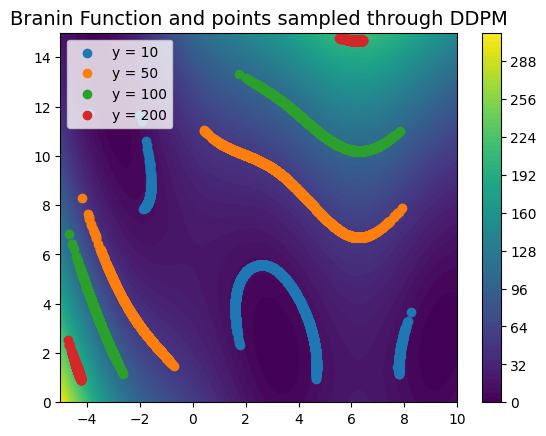

In [38]:
contour = plt.contourf(x1_grid_n, x2_grid_n, y_grid, 100)
plt.scatter(y10_data[:, 0], y10_data[:, 1], label = "y = 10")
plt.scatter(y50_data[:, 0], y50_data[:, 1], label = "y = 50")
plt.scatter(y100_data[:, 0], y100_data[:, 1], label = "y = 100")
plt.scatter(y200_data[:, 0], y200_data[:, 1], label = "y = 200")
plt.colorbar(contour)
plt.legend(fontsize = 10)
plt.title("Branin Function and points sampled through DDPM", fontsize=14)
plt.savefig("BraninResults.png", dpi=600)